#Alzheimer's Predictive Analysis

###Project Introduction:
This project aims to analyze the Alzheimer's disease dataset to identify factors associated with the diagnosis. The dataset contains demographic, lifestyle, and behavioral characteristics of patients. The goal is to develop a predictive model to identify the likelihood of an Alzheimer's disease diagnosis. This project will use supervised learning with a target variable (Diagnosis) and employ classification methods.

###Research Question:



How do factors like alcohol consumption, age, ethnic background, and medical history affect the risk of developing Alzheimer's disease? Can these variables be used to create a model that identifies individuals at high risk for the condition? What potential benefits could such a model offer for early intervention and care?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')

url = 'https://raw.githubusercontent.com/tejasayya/Alzheimer-s-Disease-Analysis/main/alzheimers_disease_data.csv'

df=pd.read_csv(url)
print(df.head())
# alz.head()

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                     

Research Question:

In [ ]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(2149, 35)

there are 2149 rows and 34 columns

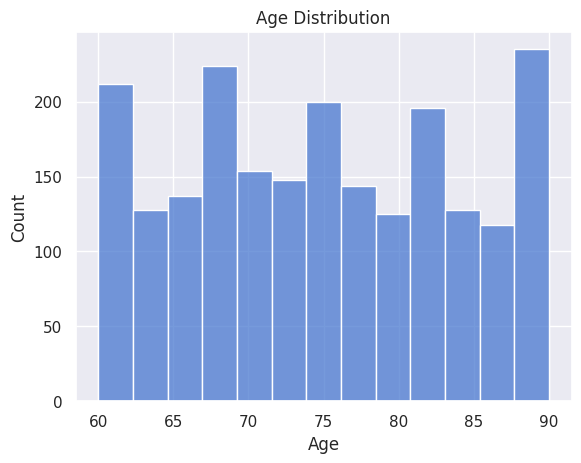

In [ ]:
#Age Distribution
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##Data Preparation

##Data Pre-Processing
Drop the PatientID and DoctorInCharge columns as they are not relevant to the analysis.
Convert the Gender and Ethnicity columns to categorical variables.
Scale the Age, BMI, AlcoholConsumption, PhysicalActivity, and DietQuality columns using Standard Scaler.
Encode the EducationLevel column using Label Encoder.

In [ ]:
# Calculate number of missing values in each row
missing_values = df.isnull().sum(axis=1)

# Calculate percentage of rows with at least one missing value
percentage_missing_rows = (sum(missing_values > 0) / len(df)) * 100

print(f"Percentage of rows with missing values: {percentage_missing_rows:.2f}%")

Percentage of rows with missing values: 0.00%




Removing unnecessary columns for better processing for the models

In [ ]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

Looking for outliers

In [ ]:
# List of few categorical columns to check
categorical_columns = ['Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
                       'Diabetes', 'Depression', 'HeadInjury', 'BehavioralProblems', 'Confusion']

def get_categorical_reasons(row):
    reasons = [col for col in categorical_columns if row[col] == 1]
    if len(reasons) == len(categorical_columns):
        return 'All the above'
    return ', '.join(reasons[:1]) + ('...' if len(reasons) > 1 else '')

df['Categorical_Reasons'] = df[categorical_columns].apply(get_categorical_reasons, axis=1)



# Create the new column with the names of the categorical columns which have a value of 1
# df['Categorical_Reasons'] = df[categorical_columns].apply(lambda row: ', '.join([col for col in categorical_columns if row[col] == 1]), axis=1)



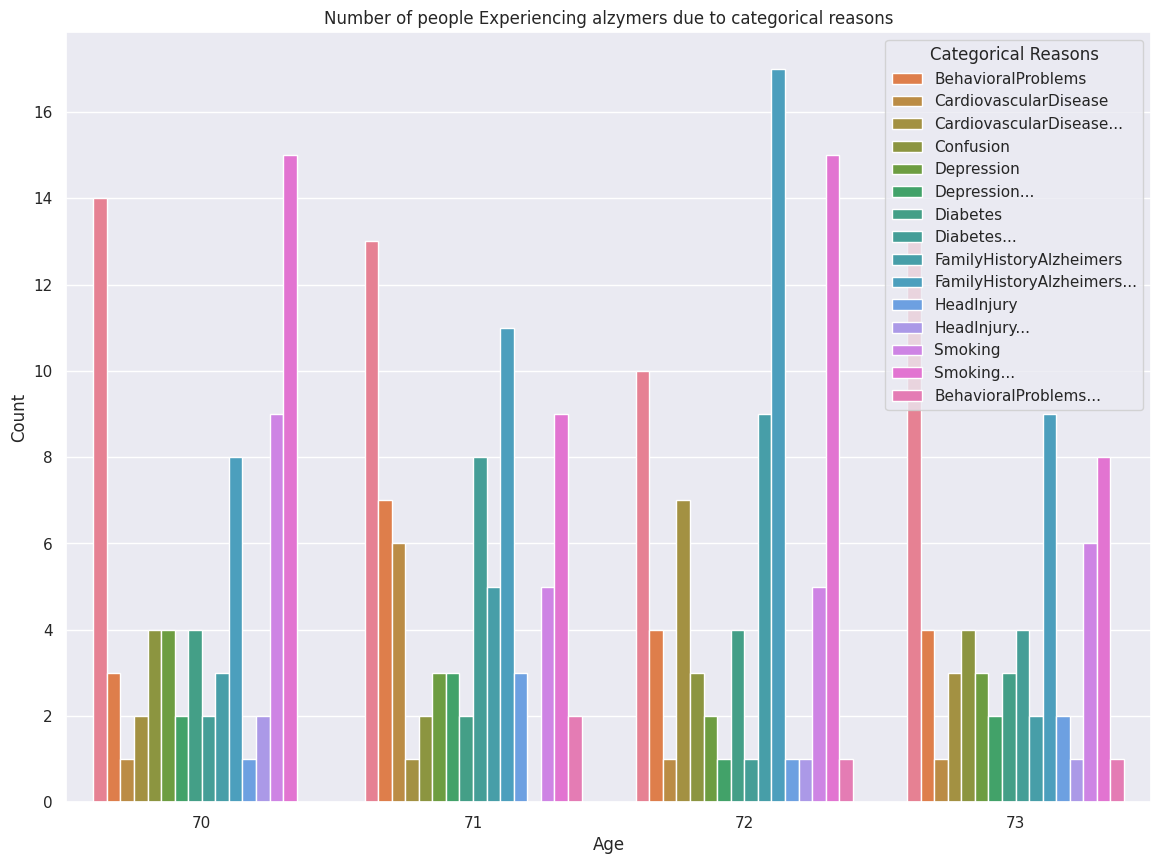

In [ ]:
filtered_alz = df[(df['Age'] >= 70) & (df['Age'] <= 73)]

# Group by Age and Categorical_Reasons and get the counts
symptom_counts = filtered_alz.groupby(['Age', 'Categorical_Reasons']).size().reset_index(name='Count')

plt.figure(figsize=(14, 10))
sns.barplot(x='Age', y='Count', hue='Categorical_Reasons', data=symptom_counts)
plt.title('Number of people Experiencing alzymers due to categorical reasons')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Categorical Reasons')
plt.show()

In [ ]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Convert categorical variables
df['Gender'] = df['Gender'].astype('category')
df['Ethnicity'] = df['Ethnicity'].astype('category')

# # Scale numerical columns
# scaler = StandardScaler()
# df[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']] = scaler.fit_transform(df[['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']])

# Encode EducationLevel
le = LabelEncoder()
df['EducationLevel'] = le.fit_transform(df['EducationLevel'])


Labeling the data

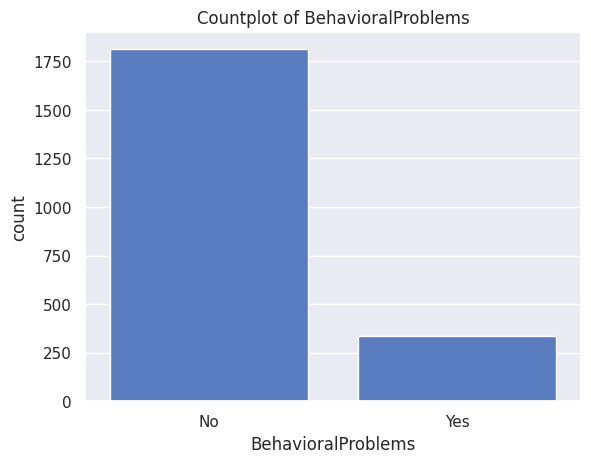

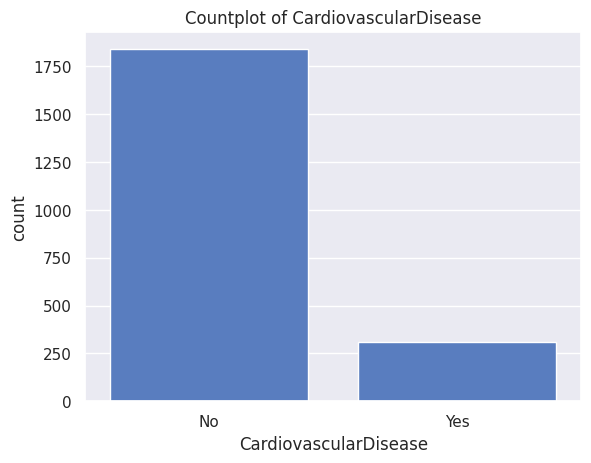

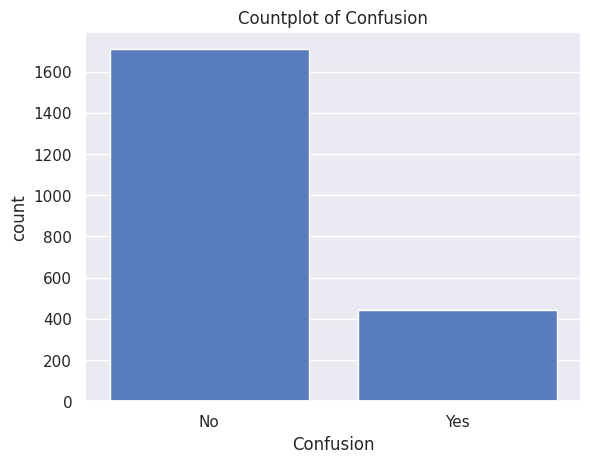

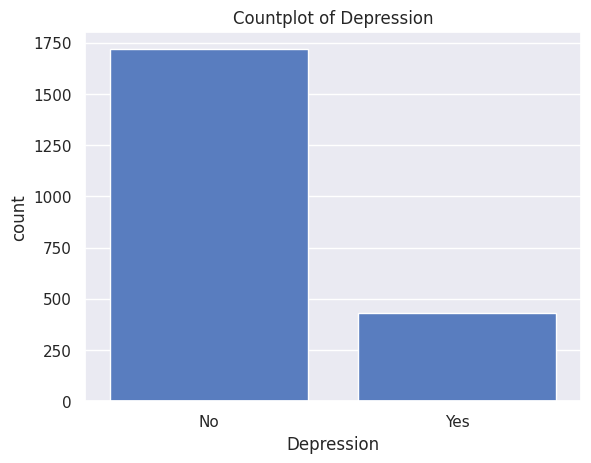

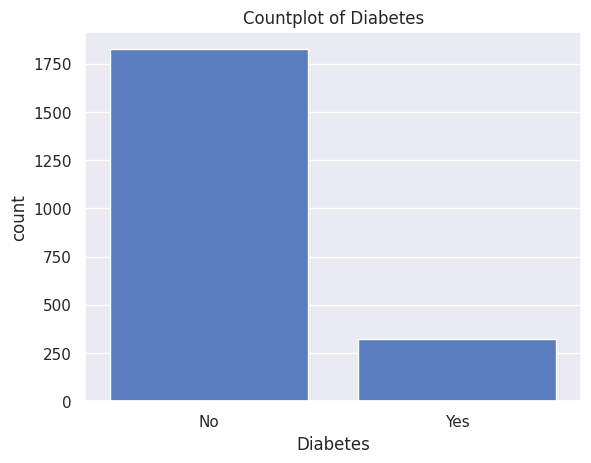

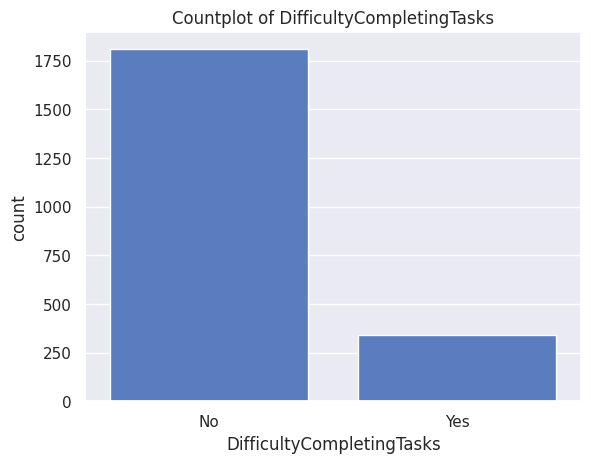

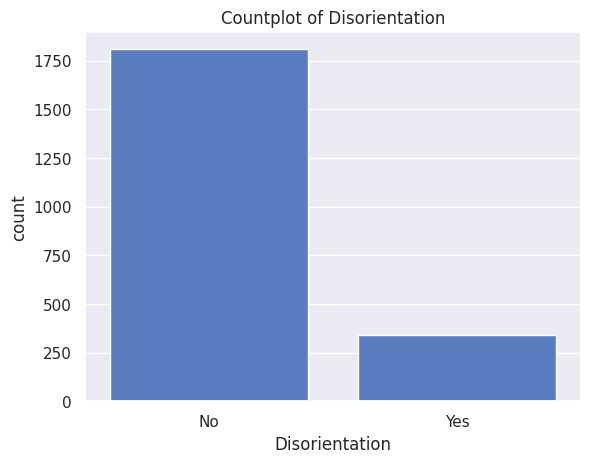

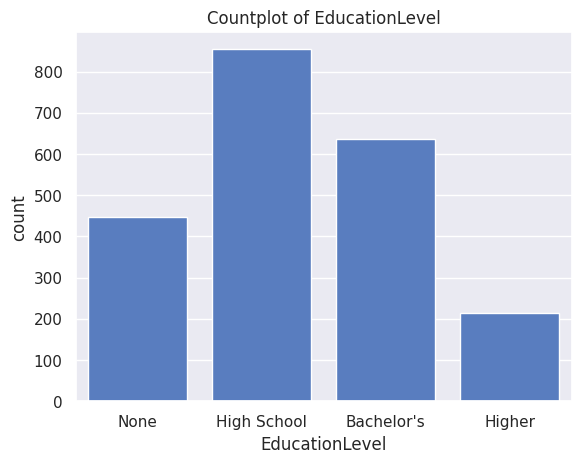

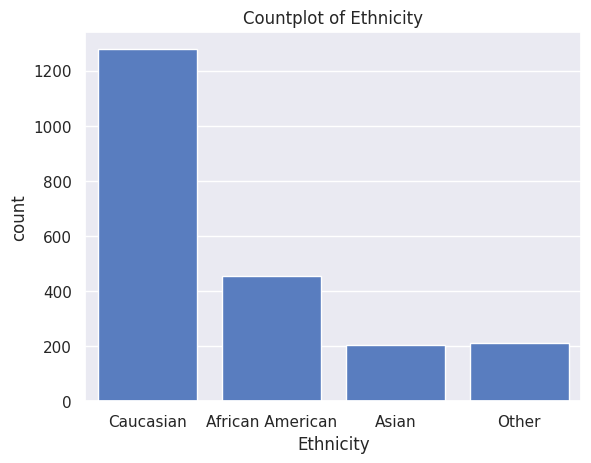

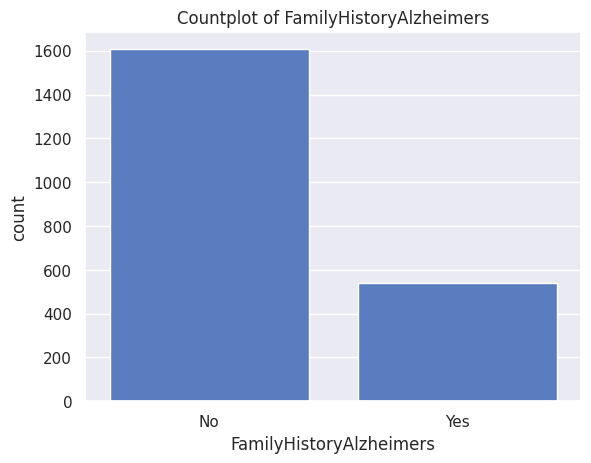

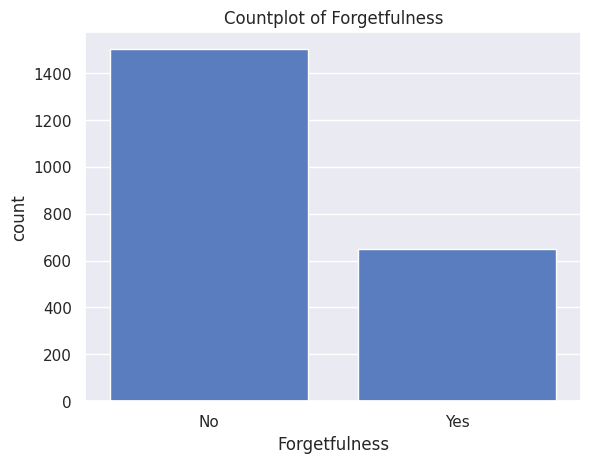

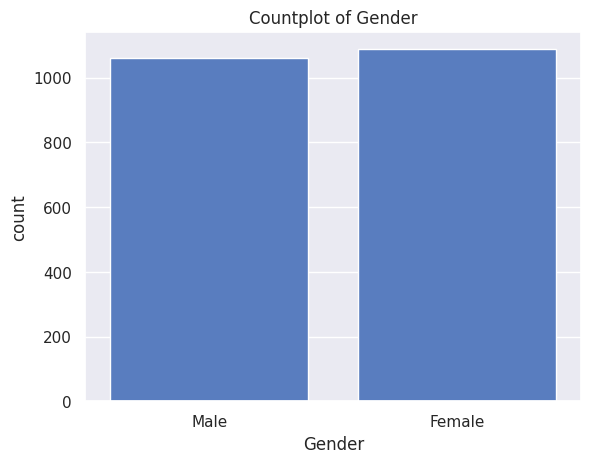

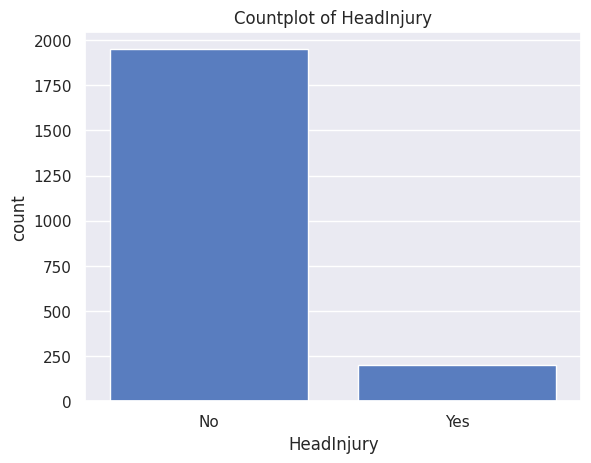

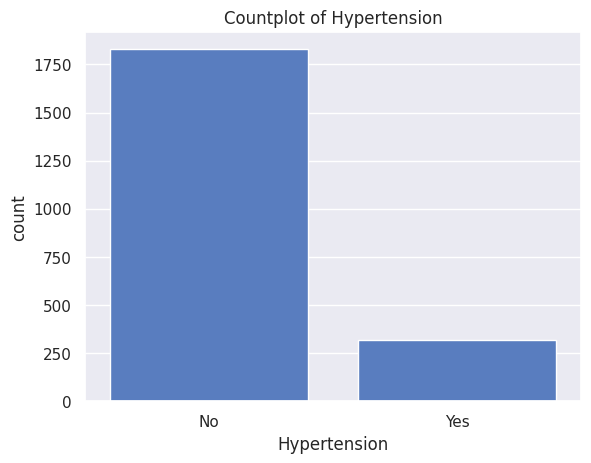

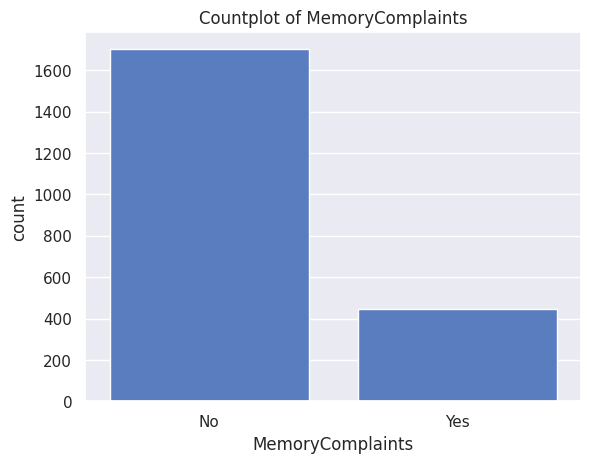

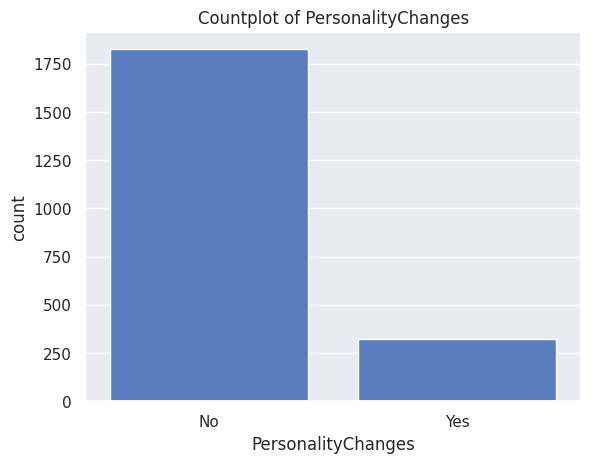

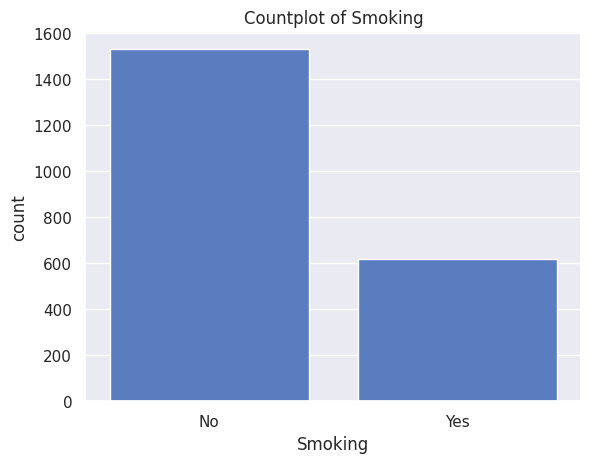

In [ ]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()


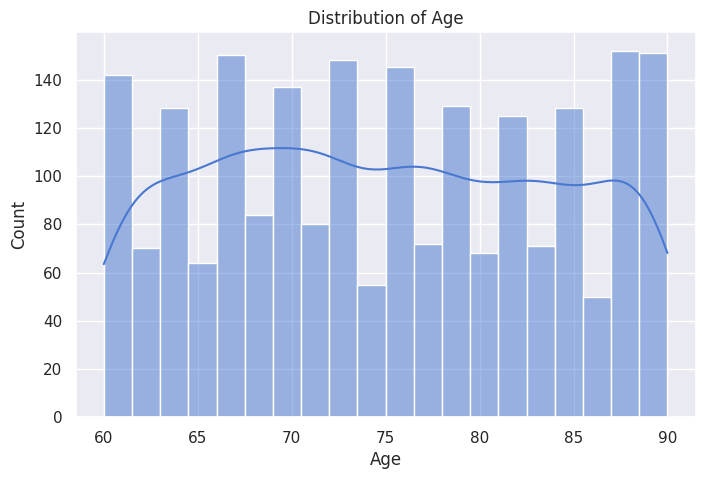

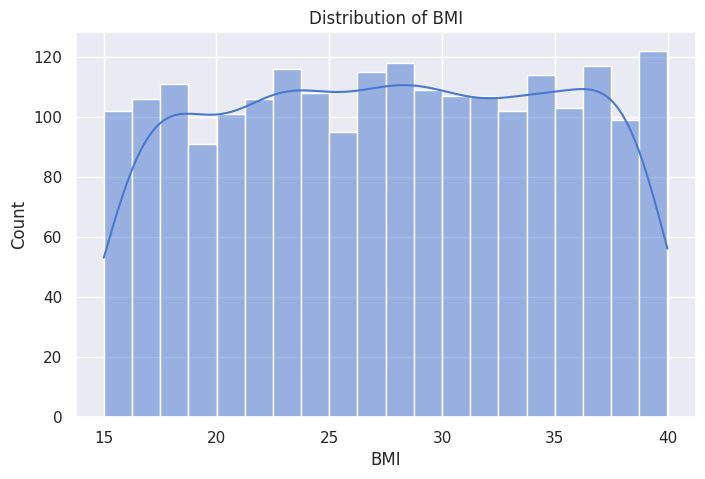

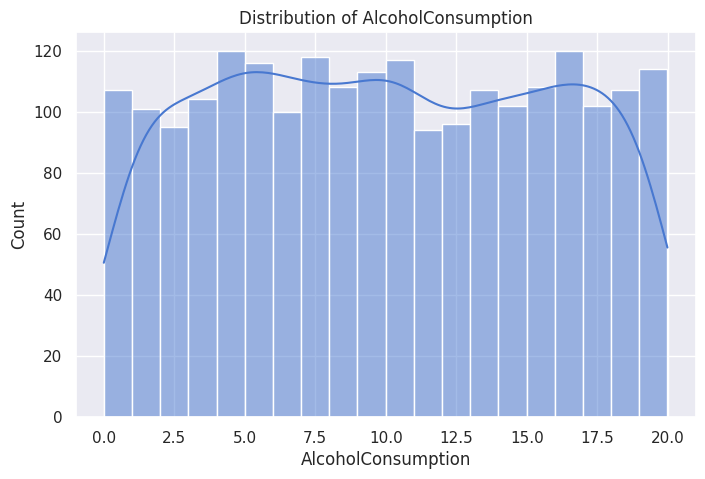

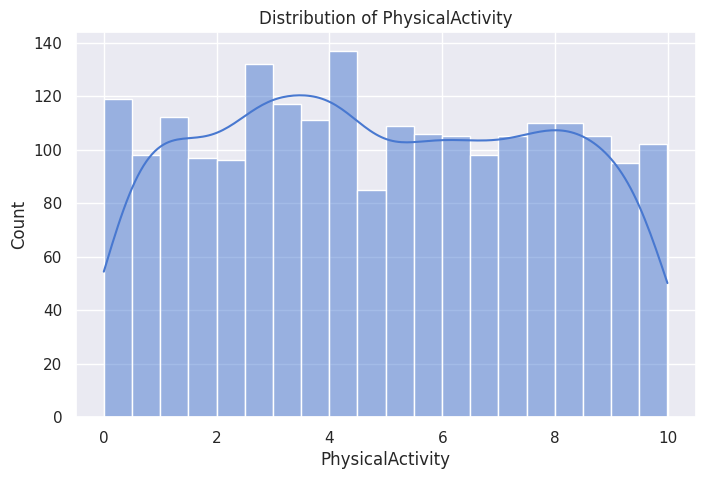

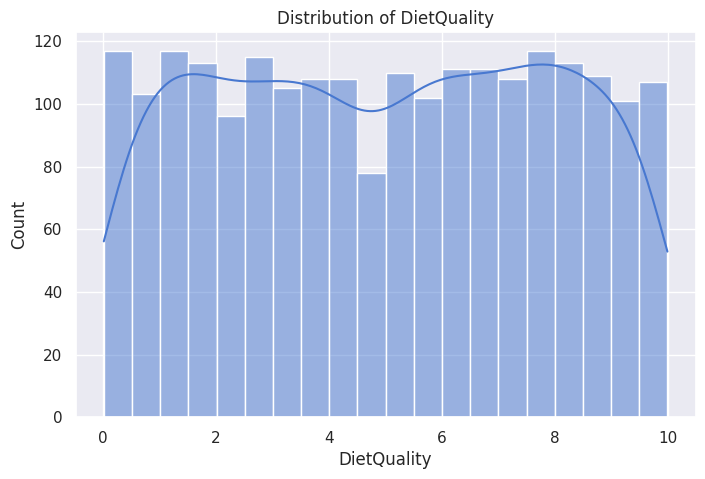

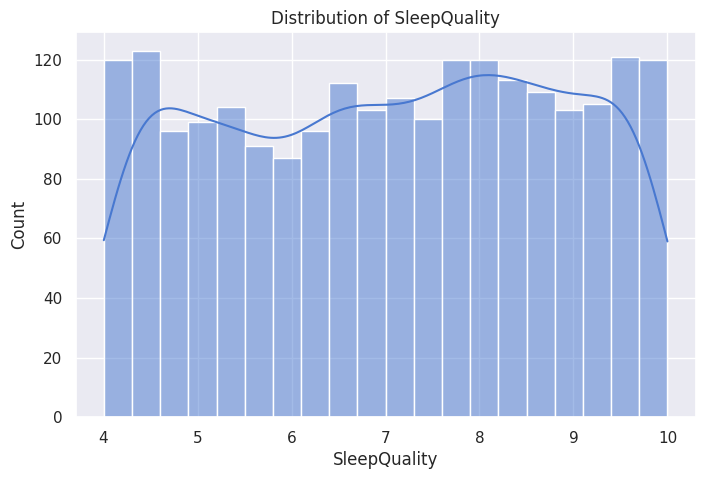

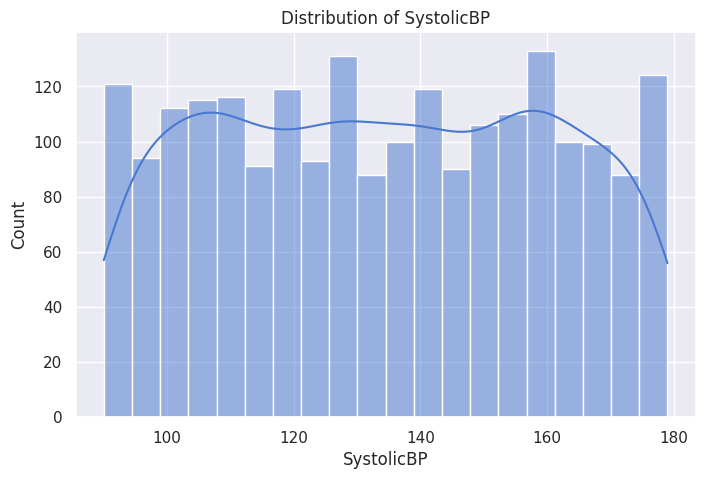

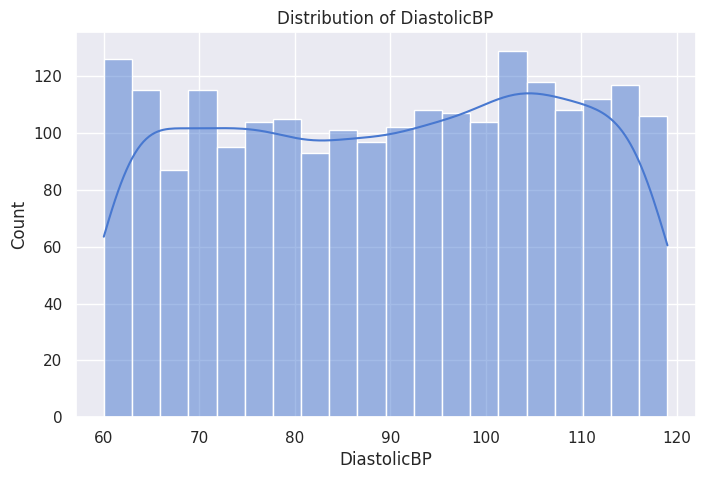

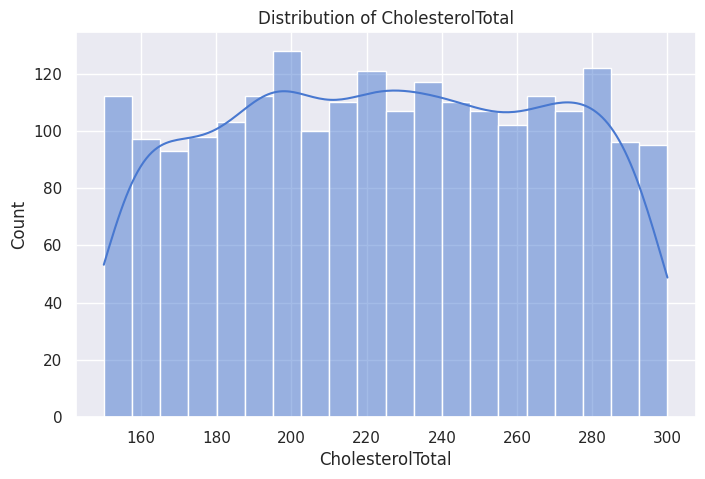

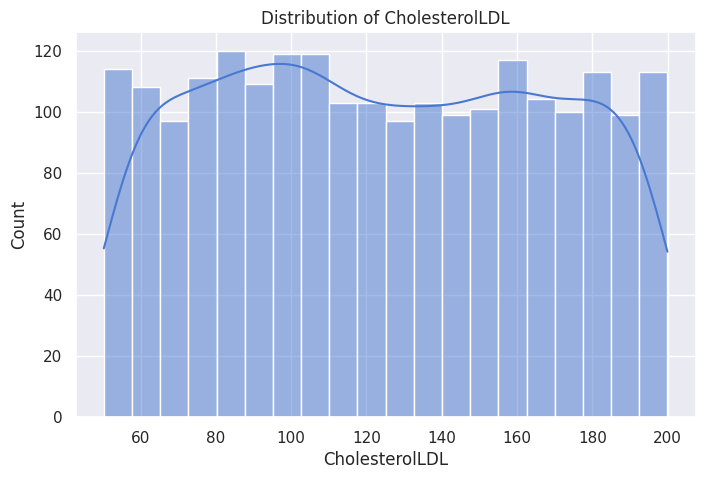

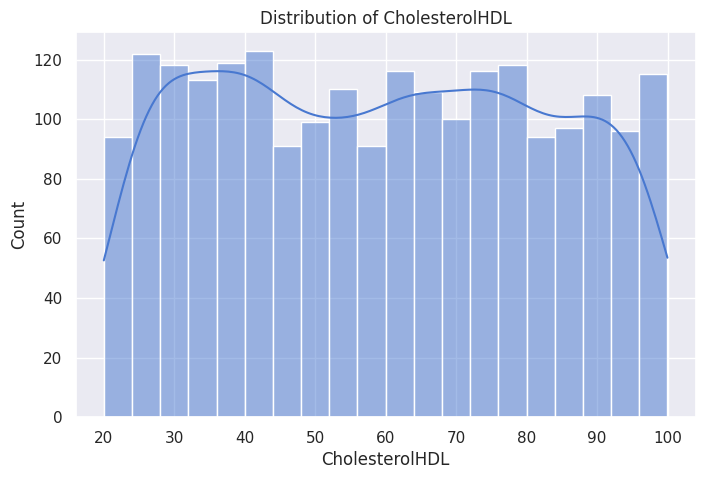

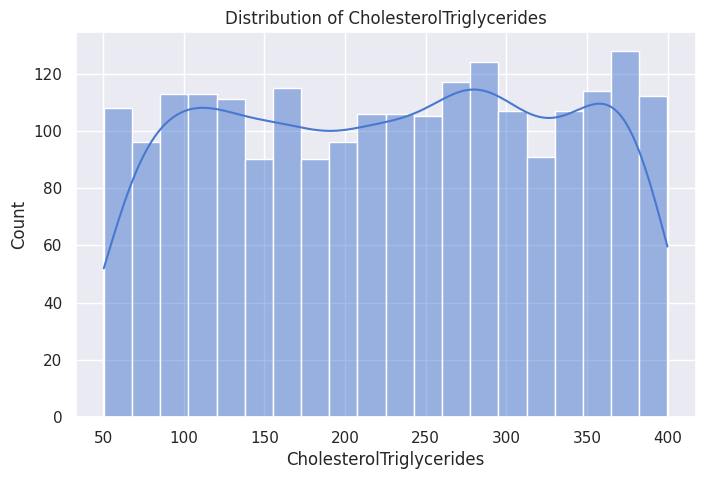

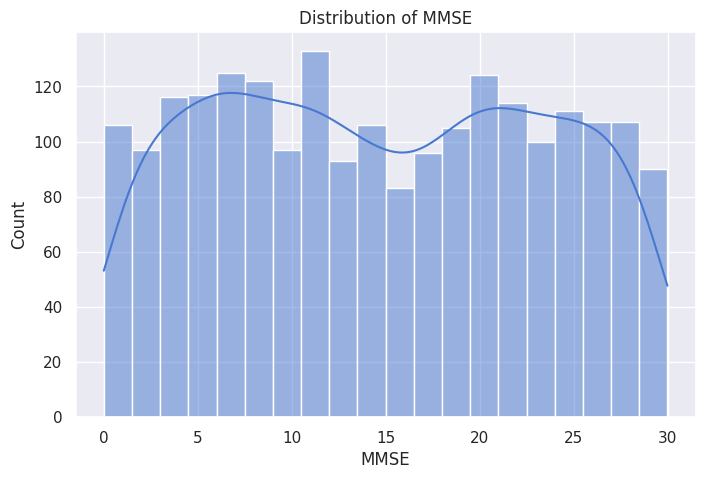

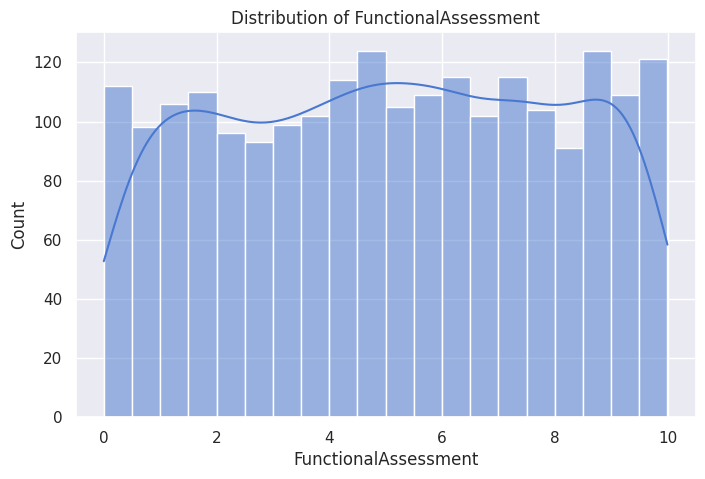

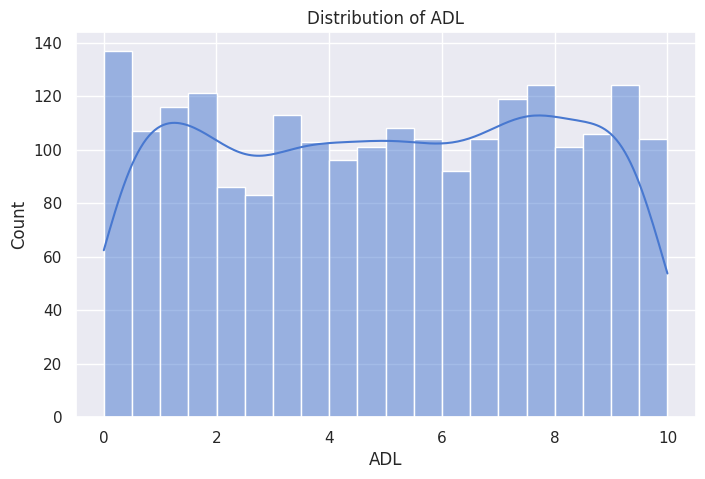

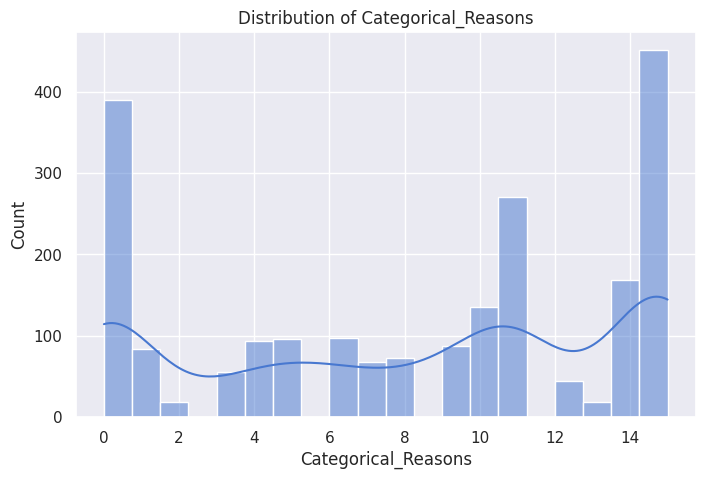

In [ ]:
df['Categorical_Reasons'] = le.fit_transform(df['Categorical_Reasons'])

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

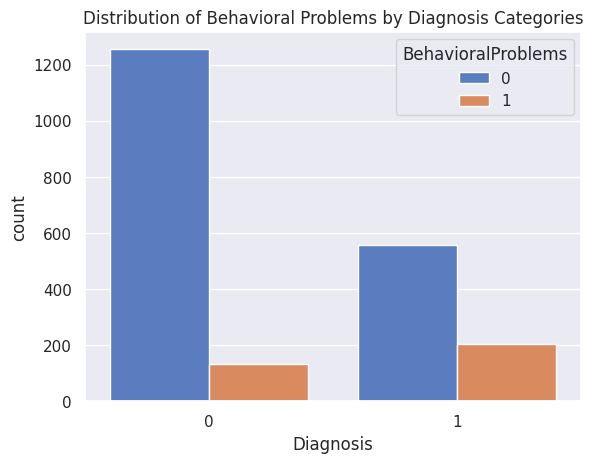

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

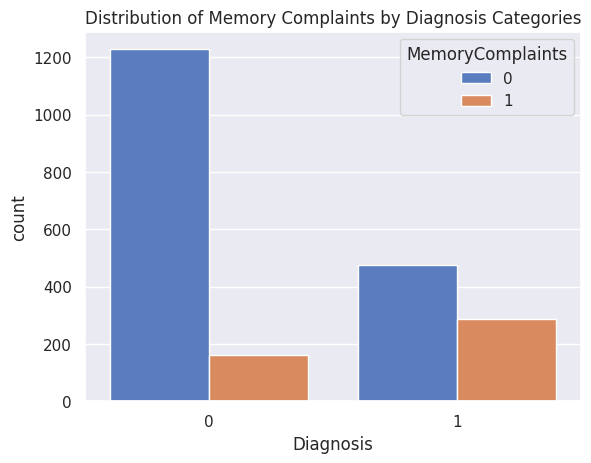

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

In [ ]:
df.drop(['Categorical_Reasons'], axis=1, inplace=True)

In [ ]:
#Split data into features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)

#Data Modelling

In [ ]:
param_grids = {
    'Gradient Boosting Classifier': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [3, 5]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5]},
    'Logistic Regression': {'C': [0.1, 1]}
}

# instantiate classification models with default parameters
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize a list to hold the results
results = []

# Initialize a dictionary to hold the confusion matrices
confusion_matrices = {}

# Fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred) * 100
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'] * 100,
        'Recall': report['weighted avg']['recall'] * 100,
        'F1-score': report['weighted avg']['f1-score'] * 100,
        'Best Parameters': grid_search.best_params_
    })

    # Compute and store the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by F1-score in descending order
results_df = results_df.sort_values(by='F1-score', ascending=False)

# Split the DataFrame into two: one for Best Parameters and one for the rest
best_params_df = results_df[['Model', 'Best Parameters']]
metrics_df = results_df.drop(columns=['Best Parameters'])

print("Training, testing, cross-validation, and hyperparameter tuning are complete.\n")

Training, testing, cross-validation, and hyperparameter tuning are complete.



#Evaluation

In [ ]:
!pip install tabulate
from tabulate import tabulate

# Print the sorted DataFrames using tabulate for better formatting
print("Metrics Comparison for Binary Classification Models (Sorted by F1-score):\n")
print(tabulate(metrics_df, headers='keys', tablefmt='psql', showindex=False))

print("\nBest Parameters for Each Model:\n")
print(tabulate(best_params_df, headers='keys', tablefmt='psql', showindex=False))

Metrics Comparison for Binary Classification Models (Sorted by F1-score):

+------------------------------+------------+-------------+----------+------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1-score |
|------------------------------+------------+-------------+----------+------------|
| Gradient Boosting Classifier |    95.356  |     95.3495 |  95.356  |    95.3518 |
| Random Forest                |    87.6161 |     88.6602 |  87.6161 |    87.0931 |
| Logistic Regression          |    80.1858 |     79.9516 |  80.1858 |    79.7292 |
| K-Nearest Neighbors          |    57.8947 |     56.531  |  57.8947 |    57.0418 |
+------------------------------+------------+-------------+----------+------------+

Best Parameters for Each Model:

+------------------------------+------------------------------------------------------------+
| Model                        | Best Parameters                                            |
|------------------------------

# PyCaret

PyCaret is a tool that allows you to streamline the process of developing and evaluating a dataset for predictive models. The automation accounts for preprocessing, model selection, tuning, and evaluation. This ia an ideal situation when dealing with health datasets.

In [ ]:
# Install pycaret
!pip install pycaret

In [ ]:
# Importing PyCaret
from pycaret.classification import *


data = pd.read_csv('https://raw.githubusercontent.com/tejasayya/Alzheimer-s-Disease-Analysis/main/alzheimers_disease_data.csv')

# Setting up the PyCaret environment
clf1 = setup(data, target='Diagnosis', session_id=456, normalize=True, feature_selection=True, remove_multicollinearity=True)

# Comparing multiple models
best_model = compare_models()

,Description,Value
0,Session id,456
1,Target,Diagnosis
2,Target type,Binary
3,Original data shape,"(2149, 35)"
4,Transformed data shape,"(2149, 7)"
5,Transformed train set shape,"(1504, 7)"
6,Transformed test set shape,"(645, 7)"
7,Numeric features,33
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9608,0.9896,0.9493,0.9412,0.9450,0.9145,0.9148,0.5750
lightgbm,Light Gradient Boosting Machine,0.9574,0.9892,0.9361,0.9447,0.9398,0.9069,0.9076,0.8040
rf,Random Forest Classifier,0.9554,0.9911,0.9361,0.9392,0.9368,0.9024,0.9033,0.8290
gbc,Gradient Boosting Classifier,0.9501,0.9814,0.9285,0.9317,0.9295,0.8909,0.8916,0.8140
dt,Decision Tree Classifier,0.9468,0.9414,0.9230,0.9268,0.9245,0.8835,0.8839,0.2790
ada,Ada Boost Classifier,0.9335,0.9492,0.9059,0.9087,0.9062,0.8547,0.8559,0.4070
et,Extra Trees Classifier,0.9322,0.9798,0.8834,0.9225,0.9020,0.8502,0.8512,0.4850
knn,K Neighbors Classifier,0.9002,0.9540,0.8439,0.8740,0.8572,0.7806,0.7823,0.3530
lr,Logistic Regression,0.8503,0.9088,0.7556,0.8121,0.7818,0.6682,0.6702,0.5700
ridge,Ridge Classifier,0.8497,0.9079,0.7462,0.8152,0.7786,0.6652,0.6672,0.2770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Tuning the best model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9735,0.9985,0.9811,0.9455,0.9630,0.9424,0.9427
1,0.9669,0.9967,0.9811,0.9286,0.9541,0.9283,0.9291
2,0.9470,0.9855,0.9815,0.8833,0.9298,0.8875,0.8906
3,0.9470,0.9834,0.9630,0.8966,0.9286,0.8866,0.8880
4,0.9467,0.9737,0.9623,0.8947,0.9273,0.8853,0.8867
5,0.9400,0.9885,0.9623,0.8793,0.9189,0.8715,0.8737
6,0.9667,0.9973,0.9811,0.9286,0.9541,0.9280,0.9288
7,0.9800,0.9936,1.0000,0.9464,0.9725,0.9568,0.9577
8,0.9600,0.9973,0.9434,0.9434,0.9434,0.9125,0.9125


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Retriving Top 10 Most Important Features in Gradient Boosting Classifier:

So far, we know what the best model is. Therefore, we can retrieve the the top features that are most important in the Gradient Boosting Classifier.

In [ ]:

# Assuming 'results' is a list of dictionaries with model performance results and parameters
results = [
    # Example entry
    {
        'Model': 'Gradient Boosting Classifier',
        'Best Parameters': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
    }
]

# Assuming 'models' is a dictionary with model classes or instances
models = {
    'Gradient Boosting Classifier': GradientBoostingClassifier
}

# Retrieve the best Gradient Boosting Classifier parameters
best_gbc = None
for result in results:
    if result['Model'] == 'Gradient Boosting Classifier':
        best_gbc = result
        break

if best_gbc:
    # Instantiate the Gradient Boosting Classifier with the best parameters
    gbc_model = models['Gradient Boosting Classifier'](**best_gbc['Best Parameters'])
    gbc_model.fit(X_train, y_train)
    feature_importances = gbc_model.feature_importances_

    # Create a DataFrame to hold feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    })

    # Sort the DataFrame by importance in descending order
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Display the top 10 most important features
    top_features_df = feature_importances_df.head(10)

    print("\nTop 10 Most Important Features in Gradient Boosting Classifier:\n")
    print(tabulate(top_features_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("Gradient Boosting Classifier was not the best model.")



Top 10 Most Important Features in Gradient Boosting Classifier:

+--------------------------+--------------+
| Feature                  |   Importance |
|--------------------------+--------------|
| FunctionalAssessment     |   0.266011   |
| ADL                      |   0.249361   |
| MMSE                     |   0.239512   |
| MemoryComplaints         |   0.112568   |
| BehavioralProblems       |   0.0787155  |
| CholesterolTotal         |   0.00972676 |
| CholesterolTriglycerides |   0.00580239 |
| BMI                      |   0.00485134 |
| SleepQuality             |   0.00480532 |
| Age                      |   0.0045534  |
+--------------------------+--------------+


In [ ]:
# Finalizing the model with PyCaret
# final_model = finalize_model(tuned_model)

# Predicting on new data - this is only for the future if you have new data
# Define new_data here
# new_data = pd.read_csv('path_to_new_data.csv')
# predictions = predict_model(final_model, data=new_data)

# Interpreting the model is not working at this time
# interpret_model(final_model)

#Conclusition/Results

In this project, we explored various machine learning models to predict [target variable - Diagnosis] using the [Alzheimer's Disease] dataset. After preparing the data, we experimented with different models including [Random Forest], [Logistic Regression], and [K-Nearest Neighbors] using PyCaret.

The best performing model was [Extreme Gradient Boosting], which achieved an accuracy of [96.08%] and an AUC-ROC score of [98.96%]. This model was able to
Identifiy top 10 features that causes Alzheimer's
1. Functional Assessment
2. ADL
3. MMSE

Some of the key insights from our analysis include:
- the ADL, MMSE, and FunctionalAssessment are the most important features
- Features like CholesterolTotal, SleepQuality, and BMI have much lower importance scores

Overall, the project demonstrated that the best model for predicting Alzheimer's Desease based on the given dataset is  Gradient Boosting Classifier, achieving up to 96.08% accuracy.


#Known Issues

Despite the successes of the project, several issues were encountered:

1. **Data Quality**:
   - The dataset contained **outliers** that could affect model performance.

2. **Model Limitations**:
   - The models may not generalize well to unseen data due to overfitting on the training set.
   - The dataset was imbalanced, which might have affected the performance of certain models, especially in predicting minority classes.

3. **Bias and Variance**:
   - The models might have inherent biases due to the nature of the dataset.
   - There was a trade-off between bias and variance in the models, affecting their predictive power.

4. **Feature Selection**:
   - Some features may not have contributed significantly to the model, leading to potential overfitting.
   - There were challenges in selecting the most relevant features due to multicollinearity.

Future work should address these issues by collecting more data, using different imputation methods, pre-processing data rigorously applying more robust cross-validation techniques, and exploring advanced feature selection methods.